<a href="https://colab.research.google.com/github/swethamani25/missing-vaalues-and-outlier-for-uni-and-bivariate-analysis-/blob/main/Missing_values_%2B_outliers_Detection_and_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#basic operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
df = pd.read_csv ("adult.csv")
print(df)

       age         workclass  fnlwgt  ... hours-per-week  native-country income
0       25           Private  226802  ...           40.0   United-States  <=50K
1       38           Private   89814  ...           50.0   United-States  <=50K
2       28         Local-gov  336951  ...           40.0   United-States   >50K
3       44           Private  160323  ...           40.0   United-States   >50K
4       18                 ?  103497  ...           30.0   United-States  <=50K
...    ...               ...     ...  ...            ...             ...    ...
19413   43           Private  300528  ...           40.0   United-States  <=50K
19414   45           Private   67716  ...           48.0   United-States   >50K
19415   48       Federal-gov  326048  ...           44.0   United-States   >50K
19416   60           Private  191188  ...           40.0   United-States  <=50K
19417   45  Self-emp-not-inc   32172  ...            NaN             NaN    NaN

[19418 rows x 15 columns]


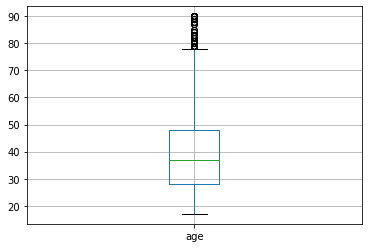

In [3]:
#univariate analysis using box plot for numerical values
df.boxplot(column=['age'])
plt.show()

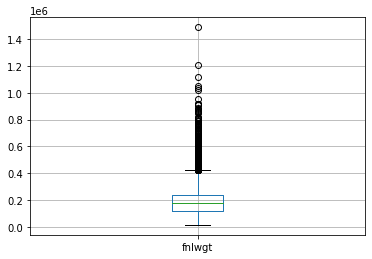

In [5]:
df.boxplot(column=['fnlwgt'])
plt.show()

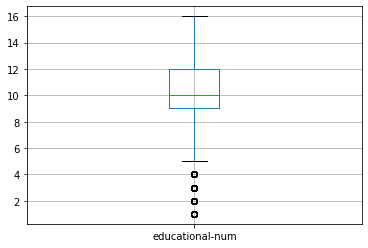

In [6]:
df.boxplot(column=['educational-num'])
plt.show()

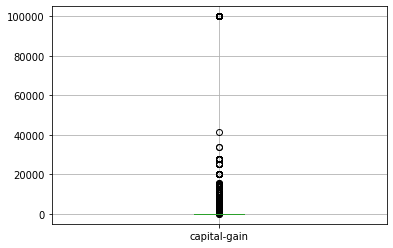

In [7]:
df.boxplot(column=['capital-gain'])
plt.show()

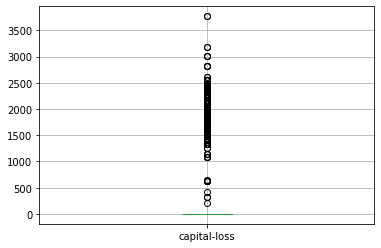

In [8]:
df.boxplot(column=['capital-loss'])
plt.show()

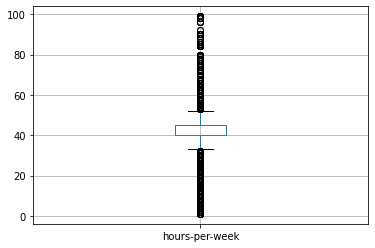

In [9]:
df.boxplot(column=['hours-per-week'])
plt.show()

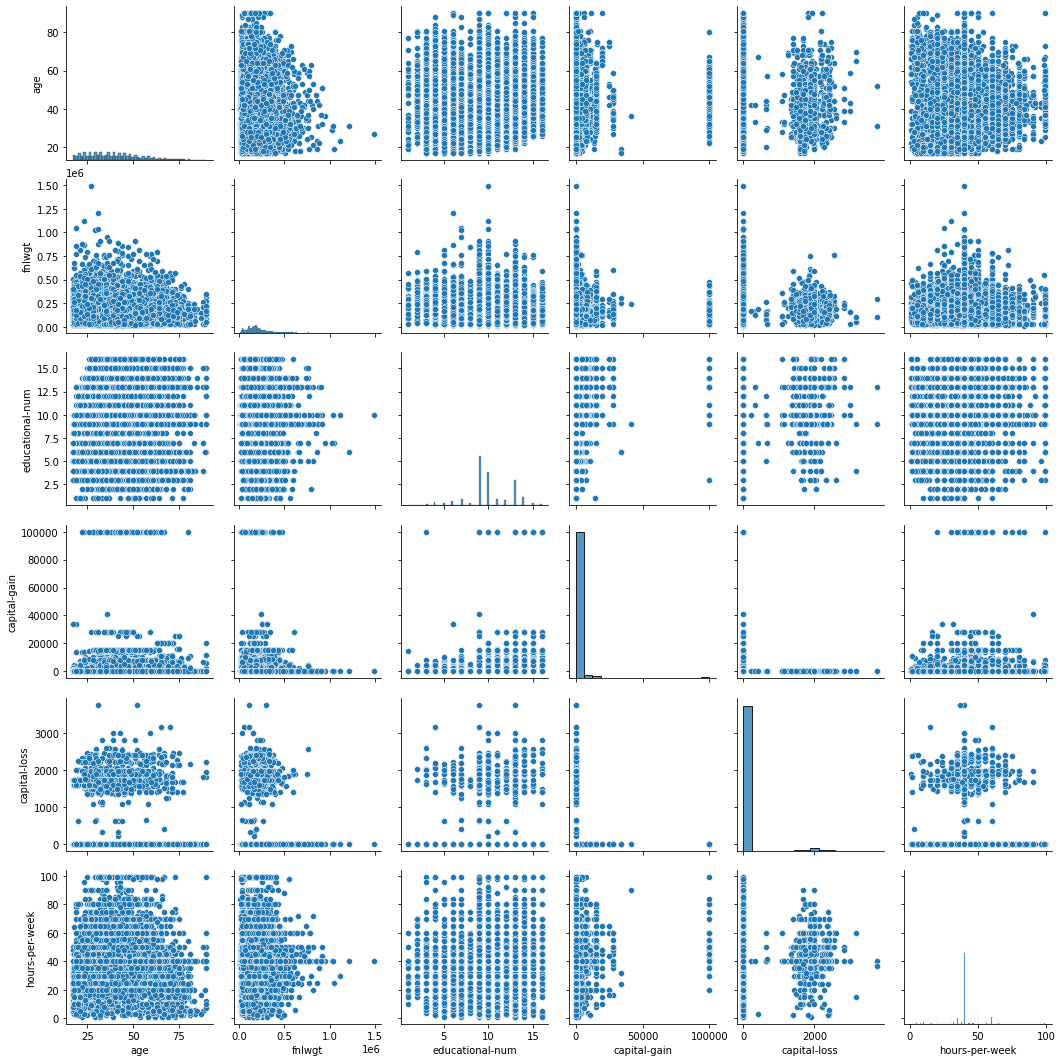

In [12]:
#bivariate analysis using pairplot
sns.pairplot(df)

In [14]:
#outlier for age 
def remove_outlier(age):
  sorted(age)
  df['age'].quantile(0.05)
  df['age'].quantile(0.95)
  Q1=df['age'].quantile(0.05)
  Q2=df['age'].quantile(0.95)
  IQR=Q1-Q2
  lower_lim=Q1-1.5*IQR
  upper_lim=Q2+1.5*IQR
  return lower_lim,upper_lim

In [16]:
#removing outlier
lowage,highage=remove_outlier(df['age'])
df['age']=np.where(df['age']>highage,highage,df['age'])
df['age']=np.where(df['age']>lowage,lowage,df['age'])

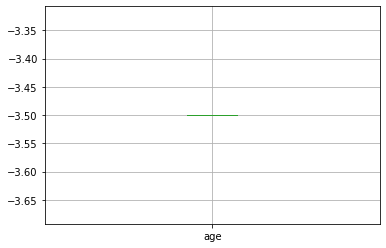

In [17]:
df.boxplot(column=['age'])
plt.show()

In [23]:
#identify the number of missing values in dataset(in each column) 
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       1
race               1
gender             1
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     1
income             1
dtype: int64

In [30]:
#deleted the missed value columns 
updated_df = df.dropna(axis=1)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19418 entries, 0 to 19417
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              19418 non-null  float64
 1   workclass        19418 non-null  object 
 2   fnlwgt           19418 non-null  float64
 3   education        19418 non-null  object 
 4   educational-num  19418 non-null  int64  
 5   marital-status   19418 non-null  object 
 6   occupation       19418 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.0+ MB


In [31]:
#this will display the rows dropped with their missing values 
df.dropna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-3.5,Private,-3.5,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,-3.5,Private,-3.5,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,-3.5,Local-gov,-3.5,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,-3.5,Private,-3.5,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,-3.5,?,-3.5,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19412,-3.5,?,-3.5,Some-college,10,Never-married,?,Own-child,Black,Male,0.0,0.0,40.0,?,<=50K
19413,-3.5,Private,-3.5,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
19414,-3.5,Private,-3.5,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,10520.0,0.0,48.0,United-States,>50K
19415,-3.5,Federal-gov,-3.5,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,44.0,United-States,>50K


In [34]:
#numerical - column standardization 
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(df[['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']])
data

array([[ 0.        ,  0.        , -1.19954777, -0.14304372, -0.22028349,
        -0.03351208],
       [ 0.        ,  0.        , -0.41995012, -0.14304372, -0.22028349,
         0.77161543],
       [ 0.        ,  0.        ,  0.74944636, -0.14304372, -0.22028349,
        -0.03351208],
       ...,
       [ 0.        ,  0.        ,  1.13924519, -0.14304372, -0.22028349,
         0.28853892],
       [ 0.        ,  0.        , -0.41995012, -0.14304372, -0.22028349,
        -0.03351208],
       [ 0.        ,  0.        , -0.03015129,         nan,         nan,
                nan]])